In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge


In [5]:
data = pd.read_csv('../../data/realtor-data.csv')  # load in data
df1 = data[data['state'] == 'California']  # filtering just the data from California 
df1 = df1.dropna() # Delets all rows that have an NA value in them so we dont have to deal with them in ML model

## Data PreProcessing and Cleaning
***


In [6]:
df1.sample(15)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2059858,109977.0,sold,1275000.0,4.0,3.0,0.17,1322665.0,Sherman Oaks,California,91423.0,2020.0,2022-02-18
2107687,46393.0,sold,305000.0,3.0,3.0,0.10,457458.0,Victorville,California,92395.0,1448.0,2022-02-01
2162882,28204.0,sold,565000.0,3.0,2.0,0.22,1718189.0,Carmichael,California,95608.0,1925.0,2021-11-29
1281606,13063.0,for_sale,749900.0,4.0,3.0,0.70,751366.0,El Cajon,California,92021.0,2654.0,1988-07-15
1313494,26809.0,for_sale,725000.0,3.0,2.0,0.32,145436.0,Paso Robles,California,93446.0,1849.0,1999-10-22
2059962,81346.0,sold,349999.0,2.0,2.0,2.95,622622.0,Winnetka,California,91306.0,925.0,2022-02-23
1269530,105162.0,for_sale,2100000.0,3.0,2.0,0.16,1157942.0,Palos Verdes Estates,California,90274.0,1852.0,2017-05-05
2133176,39502.0,sold,899000.0,3.0,2.0,0.16,787047.0,Hayward,California,94545.0,1172.0,2021-12-15
2150460,24186.0,sold,1198000.0,3.0,1.0,0.13,158413.0,Menlo Park,California,94025.0,1070.0,2022-03-23
1348654,63499.0,for_sale,375000.0,2.0,1.0,0.13,572533.0,West Sacramento,California,95691.0,748.0,2021-11-19


In [7]:
# taking a subset of the data to find the price of homes specifically in the Bay Area

# List of cities in the bay area
cities_to_include = ['Alameda', 'El Cerrito',	'Mountain View',	'San Leandro',
'Albany',	'Emeryville',	'Napa',	'San Mateo',
'American', 'Canyon',	'Fairfax',	'Newark', 'San Pablo'
'Antioch',	'Fairfield',	'Novato',	'San Rafael',
'Atherton',	'Foster City',	'Oakland',	'San Ramon',
'Belmont',	'Fremont',	'Oakley',	'Santa Clara',
'Belvedere',	'Gilroy',	'Orinda',	'Santa Rosa',
'Benicia'	,'Half Moon Bay',	'Pacifica',	'Saratoga',
'Berkeley',	'Hayward',	'Palo Alto',	'Sausalito',
'Brentwood',	'Healdsburg',	'Petaluma',	'Sebastopol',
'Brisbane',	'Hercules',	'Piedmont',	'Sonoma',
'Burlingame',	'Hillsborough',	'Pinole',	'South San Francisco',
'Calistoga',	'Lafayette',	'Pittsburg',	'St. Helena',
'Campbell',	'Larkspur',	'Pleasant Hill',	'Suisun City',
'Clayton',	'Livermore',	'Pleasanton',	'Sunnyvale',
'Cloverdale',	'Los Altos',	'Portola Valley',	'Tiburon'
'Colma',	'Los Altos Hills',	'Redwood City',	'Union City',
'Concord',	'Los Gatos',	'Richmond',	'Vacaville',
'Corte Madera',	'Martinez',	'Rio Vista',	'Vallejo',
'Cotati',	'Menlo Park',	'Rohnert Park',	'Walnut Creek',
'Cupertino',	'Mill Valley','Ross','Windsor',
'Daly City',	'Millbrae',	'San Anselmo'	,'Woodside',
'Danville',	'Milpitas',	'San Bruno',	'Yountville',
'Dixon',	'Monte Sereno',	'San Carlos',	 
'Dublin',	'Moraga',	'San Francisco',	 
'East Palo Alto',	'Morgan Hill',	'San Jose']  # replace with actual city names

# Your original DataFrame is assumed to be named 'original_df'
# Initialize an empty DataFrame to store concatenated rows
df2 = pd.DataFrame()

for city in cities_to_include:
    # Filter the rows where the city column is equal to the current city
    city_df = df1[df1['city'].isin([city])]
    # Concatenate the filtered rows into the larger DataFrame
    df2 = pd.concat([df2, city_df], ignore_index=True)
df2.head()



,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,19788.0,for_sale,1500000.0,4.0,2.0,0.08,574552.0,Alameda,California,94501.0,1617.0,2007-06-15
1,53016.0,for_sale,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,California,94501.0,2510.0,2015-06-30
2,75693.0,for_sale,475000.0,1.0,1.0,0.85,294964.0,Alameda,California,94501.0,701.0,2003-06-18
3,82024.0,for_sale,999000.0,2.0,2.0,0.12,408805.0,Alameda,California,94501.0,1288.0,2020-11-09
4,75693.0,for_sale,1395000.0,5.0,4.0,0.14,65968.0,Alameda,California,94501.0,2396.0,2022-02-25


In [8]:
# drop the columns that we wont need to predict a house's price
df3 = df2.drop(['status', 'brokered_by', 'prev_sold_date'], axis = "columns")
df3.head()

,price,bed,bath,acre_lot,street,city,state,zip_code,house_size
0,1500000.0,4.0,2.0,0.08,574552.0,Alameda,California,94501.0,1617.0
1,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,California,94501.0,2510.0
2,475000.0,1.0,1.0,0.85,294964.0,Alameda,California,94501.0,701.0
3,999000.0,2.0,2.0,0.12,408805.0,Alameda,California,94501.0,1288.0
4,1395000.0,5.0,4.0,0.14,65968.0,Alameda,California,94501.0,2396.0


In [37]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price'] / df4['house_size']
df4 = df4.drop('state', axis= 'columns')

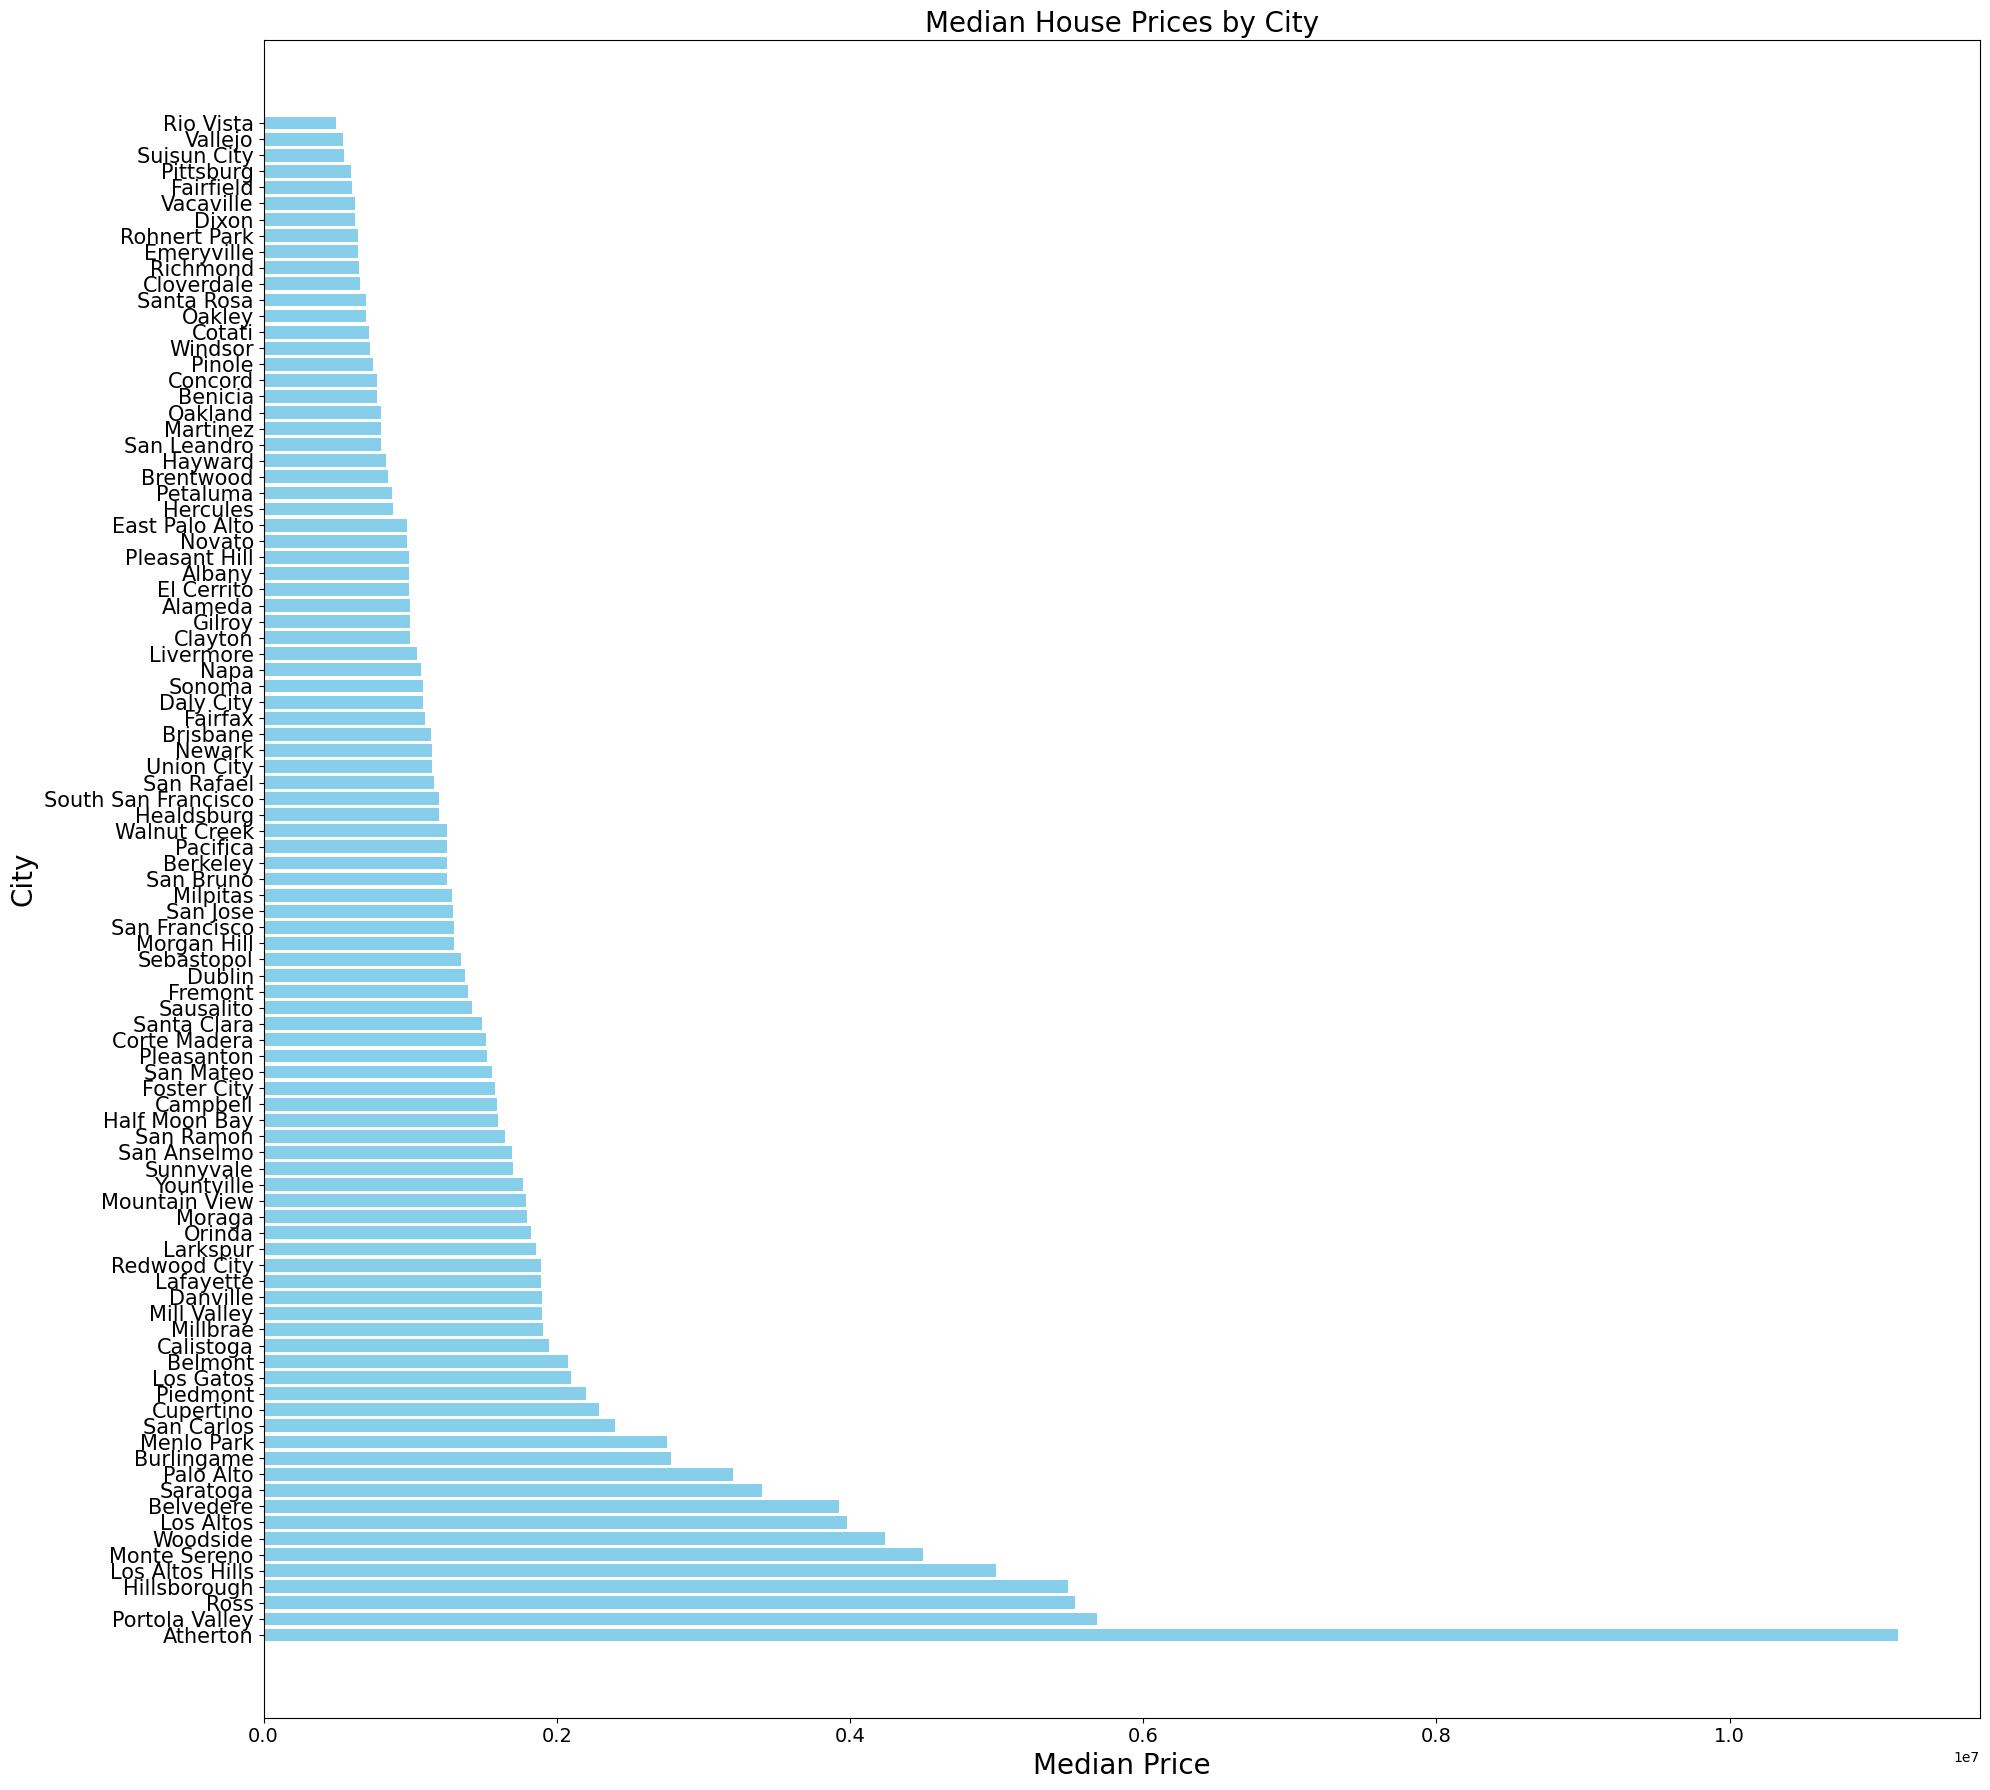

In [11]:
# Sort the DataFrame by 'price' in ascending order
city_median_prices = df4.groupby('city')['price'].median().reset_index()
city_median_prices_sorted = city_median_prices.sort_values(by='price', ascending=False)

# Increase the figure size
plt.figure(figsize=(20, 18))  # You can adjust the dimensions as needed

# Create the barh plot with adjusted label size
plt.barh(city_median_prices_sorted['city'], city_median_prices_sorted['price'], color='skyblue')
plt.xlabel('Median Price', fontsize=20)
plt.ylabel('City', fontsize=20)
plt.title('Median House Prices by City', fontsize=20)
plt.xticks(fontsize=14)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=15)  # Adjust font size for y-axis ticks

# This will adjust the layout to be more spread out
plt.tight_layout()

plt.show()

### Outlier Detection

In [12]:
df4.shape

(29151, 9)

In [13]:
# Outlier Detection and Removal

def remove_outliers(df):
    df_cleaned = pd.DataFrame()
    for i, tempdf in df.groupby('city'):
        m = np.mean(tempdf.price_per_sqft)
        st = np.std(tempdf.price_per_sqft)
        reduced_df = tempdf[(tempdf.price_per_sqft > (m-st)) & (tempdf.price_per_sqft <= (m+st))]
        df_cleaned = pd.concat([df_cleaned,reduced_df],ignore_index = True)
    return df_cleaned

In [14]:
df5 = df4.copy()
df5 = remove_outliers(df5)

In [15]:
df5.shape

(21337, 9)

## Testing Baseline Model Only with Numerical Data 
*** 

In [16]:
selected_numerical = df5[['price', 'bed', 'bath', 'acre_lot', 'house_size']]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X = selected_numerical[['bed', 'bath', 'acre_lot', 'house_size']]
y = selected_numerical['price']

# Scaling the features and target
#X_standardized = scaler.fit_transform(X)
#y_standardized = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Accuracy of LinearRegression on test set: {:.2f}'
     .format(linreg.score(X_test, y_test)))

Accuracy of LinearRegression on test set: 0.60


### Introducing Categorical Data

In [19]:
dummies = pd.get_dummies(df5.city)
dummies.head()

,Alameda,Albany,Atherton,Belmont,Belvedere,Benicia,Berkeley,Brentwood,Brisbane,Burlingame,...,South San Francisco,Suisun City,Sunnyvale,Union City,Vacaville,Vallejo,Walnut Creek,Windsor,Woodside,Yountville
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df6 = pd.concat([df5,dummies],axis = 'columns')
df6

,price,bed,bath,acre_lot,street,city,zip_code,house_size,price_per_sqft,Alameda,...,South San Francisco,Suisun City,Sunnyvale,Union City,Vacaville,Vallejo,Walnut Creek,Windsor,Woodside,Yountville
0,1399000.0,4.0,4.0,0.06,1208853.0,Alameda,94501.0,2510.0,557.370518,True,...,False,False,False,False,False,False,False,False,False,False
1,475000.0,1.0,1.0,0.85,294964.0,Alameda,94501.0,701.0,677.603424,True,...,False,False,False,False,False,False,False,False,False,False
2,999000.0,2.0,2.0,0.12,408805.0,Alameda,94501.0,1288.0,775.621118,True,...,False,False,False,False,False,False,False,False,False,False
3,1395000.0,5.0,4.0,0.14,65968.0,Alameda,94501.0,2396.0,582.220367,True,...,False,False,False,False,False,False,False,False,False,False
4,799000.0,2.0,2.0,0.07,446244.0,Alameda,94501.0,1287.0,620.823621,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21332,1785000.0,3.0,2.0,1.14,569148.0,Woodside,94062.0,2110.0,845.971564,False,...,False,False,False,False,False,False,False,False,True,False
21333,1650000.0,4.0,2.0,0.23,321223.0,Woodside,94062.0,1910.0,863.874346,False,...,False,False,False,False,False,False,False,False,True,False
21334,5400000.0,5.0,5.0,1.00,893102.0,Woodside,94062.0,4100.0,1317.073171,False,...,False,False,False,False,False,False,False,False,True,False
21335,1395000.0,3.0,2.0,0.15,556425.0,Yountville,94599.0,1353.0,1031.042129,False,...,False,False,False,False,False,False,False,False,False,True


In [21]:
df7 = df6.copy()

In [22]:
df7 = df7.drop('city', axis = 'columns')  # We drop city because we have hot-encoded the columns and no longer need the city
df7 = df7.drop('price_per_sqft', axis = 'columns') # we drop price per square foot now because it is direclty related to the price
df7 = df7.drop('street', axis = 'columns') # street is of no value to us and is too specific
df7.head()

,price,bed,bath,acre_lot,zip_code,house_size,Alameda,Albany,Atherton,Belmont,...,South San Francisco,Suisun City,Sunnyvale,Union City,Vacaville,Vallejo,Walnut Creek,Windsor,Woodside,Yountville
0,1399000.0,4.0,4.0,0.06,94501.0,2510.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,475000.0,1.0,1.0,0.85,94501.0,701.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,999000.0,2.0,2.0,0.12,94501.0,1288.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1395000.0,5.0,4.0,0.14,94501.0,2396.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,799000.0,2.0,2.0,0.07,94501.0,1287.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
X = df7.drop('price', axis='columns')
X.head

<bound method NDFrame.head of        bed  bath  acre_lot  zip_code  house_size  Alameda  Albany  Atherton  \
0      4.0   4.0      0.06   94501.0      2510.0     True   False     False   
1      1.0   1.0      0.85   94501.0       701.0     True   False     False   
2      2.0   2.0      0.12   94501.0      1288.0     True   False     False   
3      5.0   4.0      0.14   94501.0      2396.0     True   False     False   
4      2.0   2.0      0.07   94501.0      1287.0     True   False     False   
...    ...   ...       ...       ...         ...      ...     ...       ...   
21332  3.0   2.0      1.14   94062.0      2110.0    False   False     False   
21333  4.0   2.0      0.23   94062.0      1910.0    False   False     False   
21334  5.0   5.0      1.00   94062.0      4100.0    False   False     False   
21335  3.0   2.0      0.15   94599.0      1353.0    False   False     False   
21336  3.0   2.0      0.13   94599.0      1400.0    False   False     False   

       Belmont  Belve

In [24]:
y = df7.price
y.head()

0    1399000.0
1     475000.0
2     999000.0
3    1395000.0
4     799000.0
Name: price, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=10)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Accuracy of LinearRegression on test set: {:.2f}' .format(linreg.score(X_test, y_test)))

Accuracy of LinearRegression on test set: 0.84


In [26]:
print(linreg.score(X_train, y_train), 'the test score data is: ' ,linreg.score(X_test, y_test))

0.873291876915952 the test score data is:  0.8413075128264415


## Model Testing
***
The above shows us that it looks a little overfit as the score on the training data is a bit better then the score on the test data
we will now look at the different types of models, including lasso which will incorporate the regularization (L1 in this case) as well as the Ridge Regression model which looks at the L2 regularization function

In [27]:
def find_best_model(X,y):
    algos = {
        'linear_regression': {
            'model' : LinearRegression(),
            'params':{
               "positive": [True,False],
               "n_jobs": [2,3,4],
               "fit_intercept": [True, False]
            }
        },
        
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse','friedman_mse'],
               'splitter': ['best','random']
            
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params':{
                'alpha': [1,2],
               'selection': ['random','cyclic']
            
            }
        },
         'Ridge_Regression' : {
            'model' : Ridge(),
            'params':{
                'alpha': [0,2],
                'positive': [True,False],
                'fit_intercept': [True,False]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits =5, test_size = .2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_

        })

    return pd.DataFrame(scores,columns=['model','best_score', 'best_params'])

find_best_model(X,y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/L

,model,best_score,best_params
0,linear_regression,0.837176,"{'fit_intercept': True, 'n_jobs': 2, 'positive..."
1,decision_tree,0.842653,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,lasso,0.837204,"{'alpha': 2, 'selection': 'random'}"
3,Ridge_Regression,0.843385,"{'alpha': 2, 'fit_intercept': False, 'positive..."


## Model Selection
***

After looking at the table above, all the models seem very similar, so we are going to go with the more simple, linear Regression model

In [28]:
def predict_price(city,bedroom,bath,acre_lot,zip_code,sqft):
    city_index = np.where(X.columns == city)[0][0]

    x = np.zeros(len(X.columns))
    
    x[0] = bedroom
    x[1] = bath
    x[2] = acre_lot 
    x[3] = zip_code
    x[4] = sqft
    
    if city_index >= 0:
        x[city_index] = 1
    return linreg.predict([x])[0]


In [44]:
predict_price('Woodside',3,2,1.14,94062,2110)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3415504.9619971663

In [30]:
import pickle
with open('Bay_Area_House_Price_Prediction_Model.pickle', 'wb') as f:
    pickle.dump(linreg,f)

In [31]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))
